In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
import re
from unidecode import unidecode
from mpl_toolkits import mplot3d
from yellowbrick.cluster import KElbowVisualizer
print("Importado1")

nltk.download('rslp')
nltk.download('stopwords')


Importado1


[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caios\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
caminho_arquivo_1= 'cod_material_servico.txt'
df= pd.read_csv(caminho_arquivo_1,sep=";" )
df['ID_item'] = df.index.astype(str)
df.head(2)

,cod_item,desc,status,cod_grupo,grupo,cod_classe,classe,cod_classif,classif,material_servico,complex,ID_item
0,449284,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0,0
1,447288,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,PECAS / ACESSORIOS ARMAMENTO,MATERIAL,1.0,1


In [3]:
df['classif'] = df['classif'].astype(str)
df["classif"] = df["classif"].apply(lambda x: x.lower()) #converte todas as letras para minúsculo 
df["classif"] = df["classif"].apply(lambda x: re.sub('|,|\.|/|$|\(|\)|-|\+|:|•', '', x)) #remove números e caracteres especiais 
df["classif"] = df["classif"].apply(lambda x: unidecode(x)) #remove acentos 

stemmer = nltk.stem.RSLPStemmer() #converte as palavras para seu radical 
df["classif"] = df["classif"].apply(lambda x: stemmer.stem(x))
df.head()

,cod_item,desc,status,cod_grupo,grupo,cod_classe,classe,cod_classif,classif,material_servico,complex,ID_item
0,449284,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,pecas acessorios arm,MATERIAL,1.0,0
1,447288,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,pecas acessorios arm,MATERIAL,1.0,1
2,236330,"BUCHA PLACA PUNHO, MATERIAL ACO COM ROSCA INTE...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,15001.0,bucha placa punh,MATERIAL,1.0,2
3,451952,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL METAL ...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,pecas acessorios arm,MATERIAL,1.0,3
4,448489,"PECAS / ACESSORIOS ARMAMENTO, MATERIAL ACO TI...",ATIVO,10.0,ARMAMENTO,1005.0,ARMAS DE FOGO DE CALIBRE ATE 120MM,1712.0,pecas acessorios arm,MATERIAL,1.0,4


In [4]:
# Importancia Relativa das Palavras, testar sem esse passo depois
#stopwords = nltk.corpus.stopwords.words('portuguese')
#stopwords.extend(["nao"])
#----------------------------------------------------
#vec = TfidfVectorizer(stop_words=stopwords)
#vec.fit(df.dsc_item.values)
#features = vec.transform(df.dsc_item.values)

# tirando a questao de stopwords
vec = TfidfVectorizer()
vec.fit(df.classif.values)
features = vec.transform(df.classif.values)

In [5]:
wcss = []
for cluster in range(2,10):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)
    cls.fit(features)
    silhouette_avg = v_measure_score(df.classif.values, cls.labels_)
    print("For n_clusters =", cluster,"The average silhouette_score is :", silhouette_avg)
    wcss.append(cls.inertia_)
    
df['ID_cluster'] = cls.labels_

C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.0613865801040389


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.021918145839355845


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.035295496939691334


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.045645280552774135


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.05817397908949558


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.02951068808000085


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.13601713488051081


C:\Users\caios\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.0928037957050926


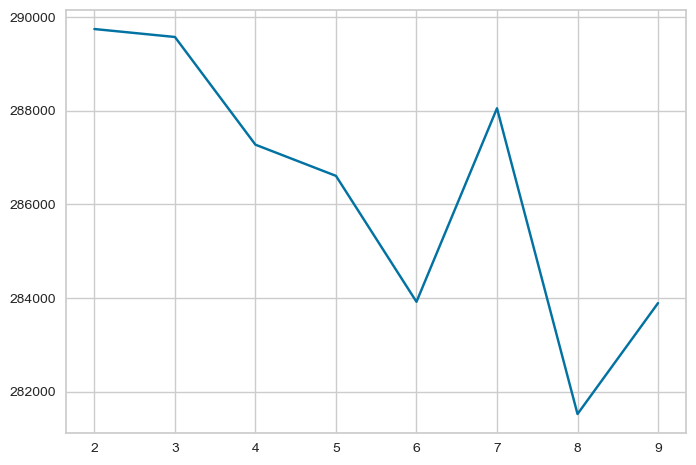

In [9]:
clusters = [i for i in range(2,10)]
plt.plot(clusters, wcss)
#df.head(20)
#nome_arquivo_saida = 'Output_cod_material_servico.csv'
# Use o método to_csv para salvar o DataFrame com o nome especificado
#df.to_csv(nome_arquivo_saida, index=False) 

MemoryError: Unable to allocate 27.6 GiB for an array with shape (292908, 12631) and data type float64

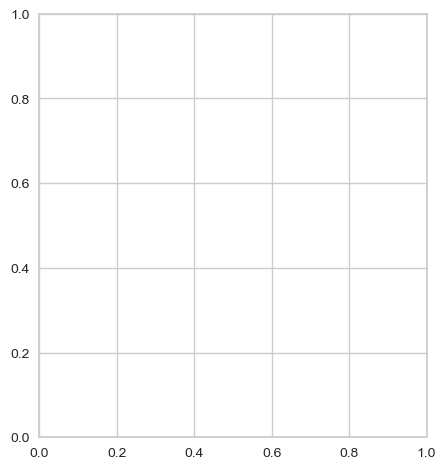

In [11]:
for cluster in range(2, 4):
    cls = MiniBatchKMeans(n_clusters=cluster, random_state=42)  # Você pode alterar o valor de random_state

    cls.fit(features)

    # Visualização 2D
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)

    pca = PCA(n_components=2, random_state=0)
    reduced_features = pca.fit_transform(features.toarray())
    reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    ax.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features))
    ax.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='o', s=150, edgecolor='k')

    for i, c in enumerate(reduced_cluster_centers):
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    plt.title("Análise de cluster k = %d" % cluster)
    plt.xlabel('Dispersão em X')
    plt.ylabel('Dispersão em Y')

    # Visualização 3D
    #ax = fig.add_subplot(1, 2, 2, projection="3d")

    #pca = PCA(n_components=3, random_state=0)
    #reduced_features = pca.fit_transform(features.toarray())
    #reduced_cluster_centers = pca.transform(cls.cluster_centers_)

    #ax.scatter3D(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], marker='o', s=150, edgecolor='k', c=cls.predict(features))

    #plt.title("Análise de cluster k = %d" % cluster)
    #plt.xlabel('Dispersão em X')
    #plt.ylabel('Dispersão em Y')

    # Salva o arquivo de imagem 3D
    #plt.savefig("imagens/grafico_cluster_k=%d" % cluster)
    plt.show()